# 사이킷런으로 수행하는 타이타닉 생존자

In [5]:
#변수별 정보

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- passengerid : 탑승자 데이터 일련번호
- survived : 생존여부 0=사망, 1=생존
- Pclass : 티켓 등급 1=일등석,2=이등석,3=삼등석
- sex : 성별
- name : 이름
- sibsp : 함께 탑승한 형제자매 or 배우자 인원수
- parch : 함께 탑승한 부모님 or 어린이 인원수 
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구 C=Cherbourg, Q= Queenstown, S=Southampton

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Null 값 제거 및 데이터 준비

In [8]:
# Null값 개수 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
## 데이터 전처리 : 결측치 처리

#Null값 처리

titanic_df['Age'].fillna(titanic_df['Age'].mean, inplace=True)
titanic_df['Cabin'].fillna("N",inplace=True)
titanic_df['Embarked'].fillna("N",inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
# 문자열 변수(피쳐) 빈도 분포 확인 : value_counts()
# sex, cabin, embarked
print('Sex분포 : \n', titanic_df['Sex'].value_counts())
print('cabin분포 : \n', titanic_df['Cabin'].value_counts())
print('embarked분포 : \n', titanic_df['Embarked'].value_counts())

Sex분포 : 
 male      577
female    314
Name: Sex, dtype: int64
cabin분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
F2               3
              ... 
B71              1
C70              1
C50              1
C101             1
A16              1
Name: Cabin, Length: 148, dtype: int64
embarked분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [21]:
# cabin value를 선실 등급만으로 표기
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]

# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자 수 분포

In [29]:
# 성별에 따른 생존자 수 분포 : groupby 로 묶어서 보기
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

### 성별에 따른 생존자 수 분포 막대그래프 시각화

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

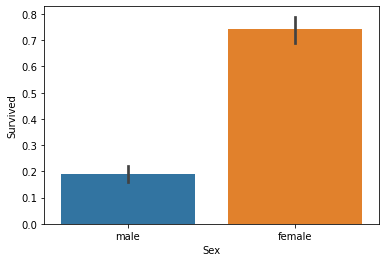

In [30]:
sns.barplot(x='Sex',y='Survived',data = titanic_df)

### 부자와 가난한 사람 간의 생존 확률

- 부의 측정 기준 : 객실등급
- 객실 등급별 성별에 따른 생존확률

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

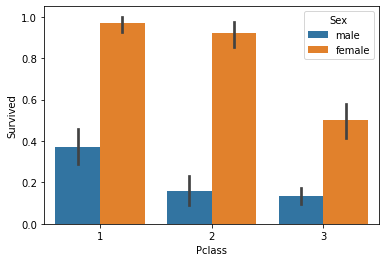

In [34]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성은 1,2등실에 대한 생존확률차가 크지 않으나 3등실의 경우 생존확률이 상대적으로 낮다
- 남성의 경우 1등실의 생존활률이 이,삼등실보다 상대적으로 높다

### Age에 따른 생존확률  : 연령 -> 범주로 나누기

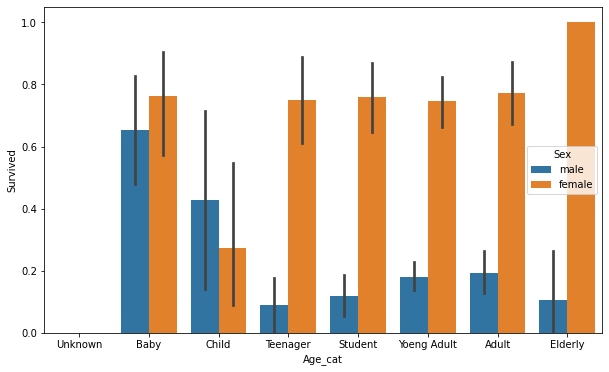

In [35]:
def get_category(age):
    cat = ''
    if age <= -1:cat = 'Unknown'
    elif age <= 5:cat = 'Baby'
    elif age <= 12:cat = 'Child'
    elif age <= 18:cat = 'Teenager'
    elif age <= 25:cat = 'Student'
    elif age <= 35:cat = 'Yoeng Adult'
    elif age <= 60:cat = 'Adult'
    else : cat = 'Elderly'
    return cat

# 막대 그래프의 크기 figure 조정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시
group_names = ['Unknown','Baby','Child','Teenager','Student','Yoeng Adult','Adult','Elderly']

#lambda 식으로 위에서 생성한 get_category 함수를 반환값 지정
#get_category(x)는 입력값으로''Age' 칼럼 값을 받아서 해당cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

## Encoding